## Statistical Coverage Product viewer

This notebook makes timeseries plots of Peter May's Statistical Coverage Product as generated by derive_scp.py. It then separates the product into the different Pope regimes.

In [4]:
from netCDF4 import Dataset
from matplotlib import pyplot as plt
from datetime import datetime
from matplotlib import dates
import numpy as np
%matplotlib inline
import pandas

Input data path

In [5]:
scp_netcdf_file_path = '/home/rjackson/data/SCP.cdf'
pope_netcdf_file_path = '/home/rjackson/data/Pope_regime.cdf'
mjo_index_file = '/home/rjackson/data/rmm.74toRealtime.txt'

Load netCDF variables

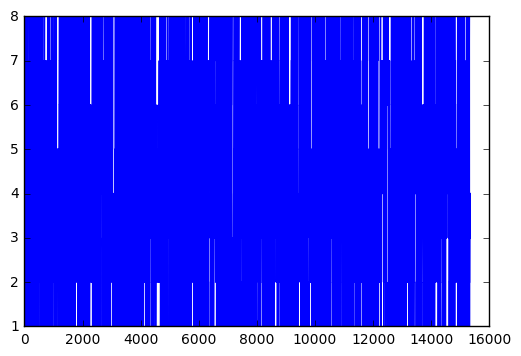

In [6]:
scp_netcdf = Dataset(scp_netcdf_file_path, mode='r')

years = scp_netcdf.variables['years'][:]
months = scp_netcdf.variables['months'][:]
days = scp_netcdf.variables['days'][:]
hours = scp_netcdf.variables['hours'][:]
minutes = scp_netcdf.variables['minutes'][:]
SCP0 = scp_netcdf.variables['SCP0'][:,:]
SCP10 = scp_netcdf.variables['SCP10'][:,:]
SCP20 = scp_netcdf.variables['SCP20'][:,:]
SCP30 = scp_netcdf.variables['SCP30'][:,:]
SCP40 = scp_netcdf.variables['SCP40'][:,:]
levels = scp_netcdf.variables['levels'][:]
scp_netcdf.close()

in_netcdf = Dataset(pope_netcdf_file_path)
year_p = in_netcdf.variables['year'][:]
month_p = in_netcdf.variables['month'][:]
day_p = in_netcdf.variables['day'][:]
groups_p = in_netcdf.variables['groups']

groups_mapped_to_scp = np.zeros(len(years))
data = pandas.read_csv(mjo_index_file,
                       header=2,
                       delim_whitespace=True)
data_matrix = np.ma.array(data.values)
year = data_matrix[:,0]
month = data_matrix[:,1]
day = data_matrix[:,2]
index = data_matrix[:,5]
index[index > 99].mask = True
plt.plot(index[index < 99])

for i in range(0, len(years)):
    index = np.logical_and(year_p == years[i], 
                           np.logical_and(month_p == months[i],  
                                          day_p == days[i]))
    index = np.where(index == True)
    index = index[0]
    if(len(index) > 0):
        groups_mapped_to_scp[i] = groups_p[index[0]]
    else:
        groups_mapped_to_scp[i] = float('nan') 


Display statistical coverage product

In [7]:
bins_10 = np.linspace(0,100,20)
bins_20 = np.linspace(0,60,20)
bins_30 = np.linspace(0,50,20)
bins_40 = np.linspace(0,50,20)
SCP10_hist = np.zeros((len(levels), 5, len(bins_10)-1))
SCP20_hist = np.zeros((len(levels), 5, len(bins_20)-1))
SCP30_hist = np.zeros((len(levels), 5, len(bins_30)-1))
SCP40_hist = np.zeros((len(levels), 5, len(bins_40)-1))

for i in range(0,5):
    for j in range(0, len(levels)):
        in_group = np.logical_and(groups_mapped_to_scp == i,
                                  SCP20[:,1] > 0.1)
        hist, bins = np.histogram(SCP10[np.where(in_group),j],
                                  bins=bins_10,
                                  normed=True)
        SCP10_hist[j,i,:] = hist
        hist, bins = np.histogram(SCP20[np.where(in_group),j],
                                  bins=bins_20,
                                  normed=True)
        SCP20_hist[j,i,:] = hist
        hist, bins = np.histogram(SCP30[np.where(in_group),j],
                                  bins=bins_30,
                                  normed=True)
        SCP30_hist[j,i,:] = hist
        hist, bins = np.histogram(SCP40[np.where(in_group),j],
                                  bins=bins_40,
                                  normed=True)
        SCP40_hist[j,i,:] = hist
        

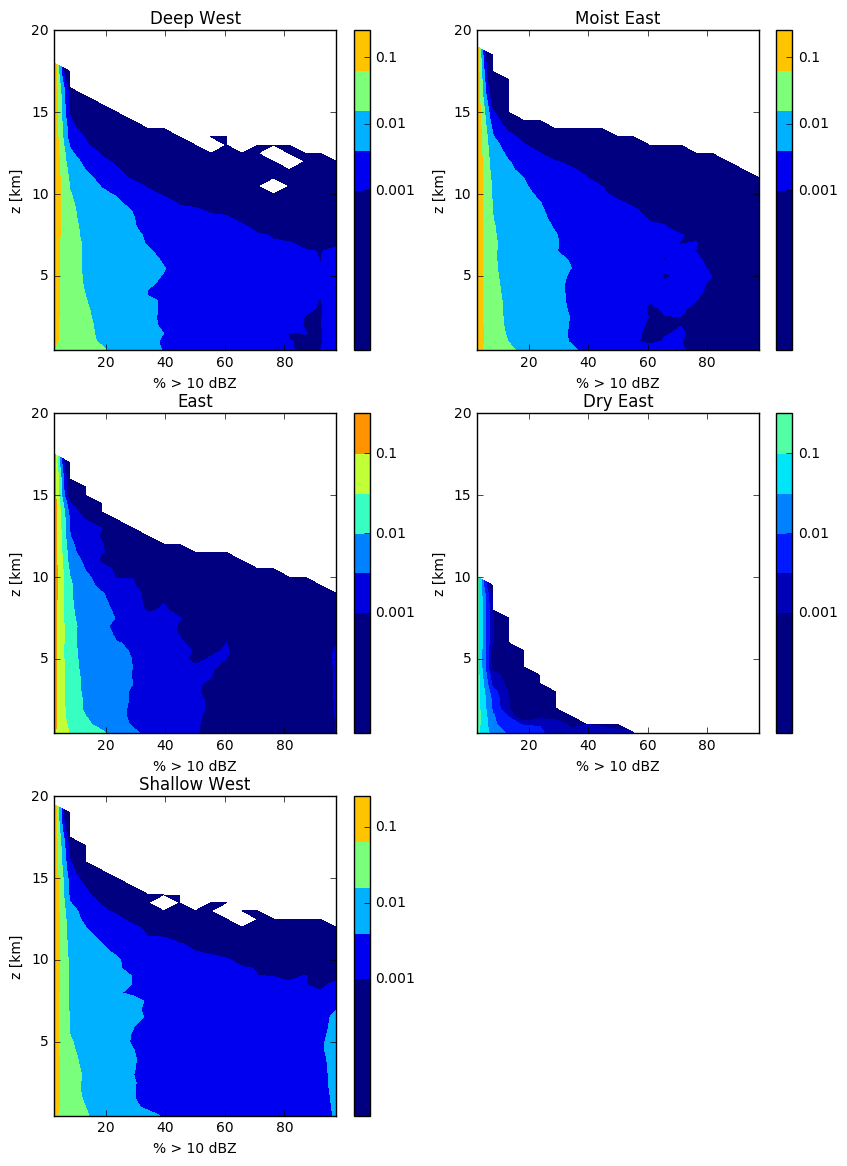

In [8]:
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,14))
plt.subplot(321)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist[:,0,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Deep West')

plt.subplot(322)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist[:,1,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Moist East')

plt.subplot(323)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist[:,2,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])

ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('East')

plt.subplot(324)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX, YY, np.log10(np.squeeze(SCP10_hist[:,3,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,2])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Dry East')

plt.subplot(325)
Y = levels
X = ((bins_10[1:]+bins_10[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP10_hist[:,4,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 10 dBZ')
plt.ylabel('z [km]')
plt.title('Shallow West')

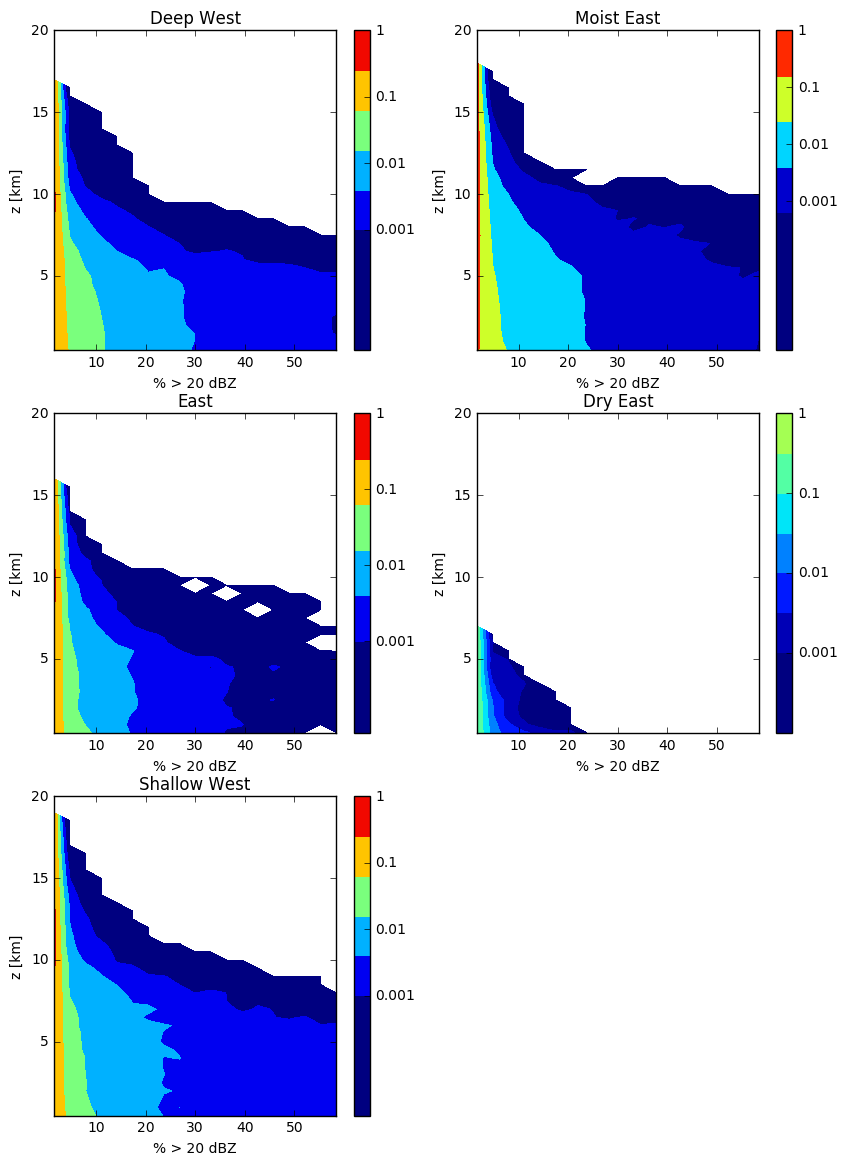

In [9]:
Y = levels
X = ((bins_20[1:]+bins_20[0:-1])/2)

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,14))
plt.subplot(321)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist[:,0,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Deep West')

plt.subplot(322)
Y = levels
X = ((bins_20[1:]+bins_20[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist[:,1,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Moist East')

plt.subplot(323)
Y = levels
X = ((bins_20[1:]+bins_20[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist[:,2,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])

ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('East')

plt.subplot(324)
Y = levels
X = ((bins_20[1:]+bins_20[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX, YY, np.log10(np.squeeze(SCP20_hist[:,3,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,2])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Dry East')

plt.subplot(325)
Y = levels
X = ((bins_20[1:]+bins_20[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP20_hist[:,4,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 20 dBZ')
plt.ylabel('z [km]')
plt.title('Shallow West')

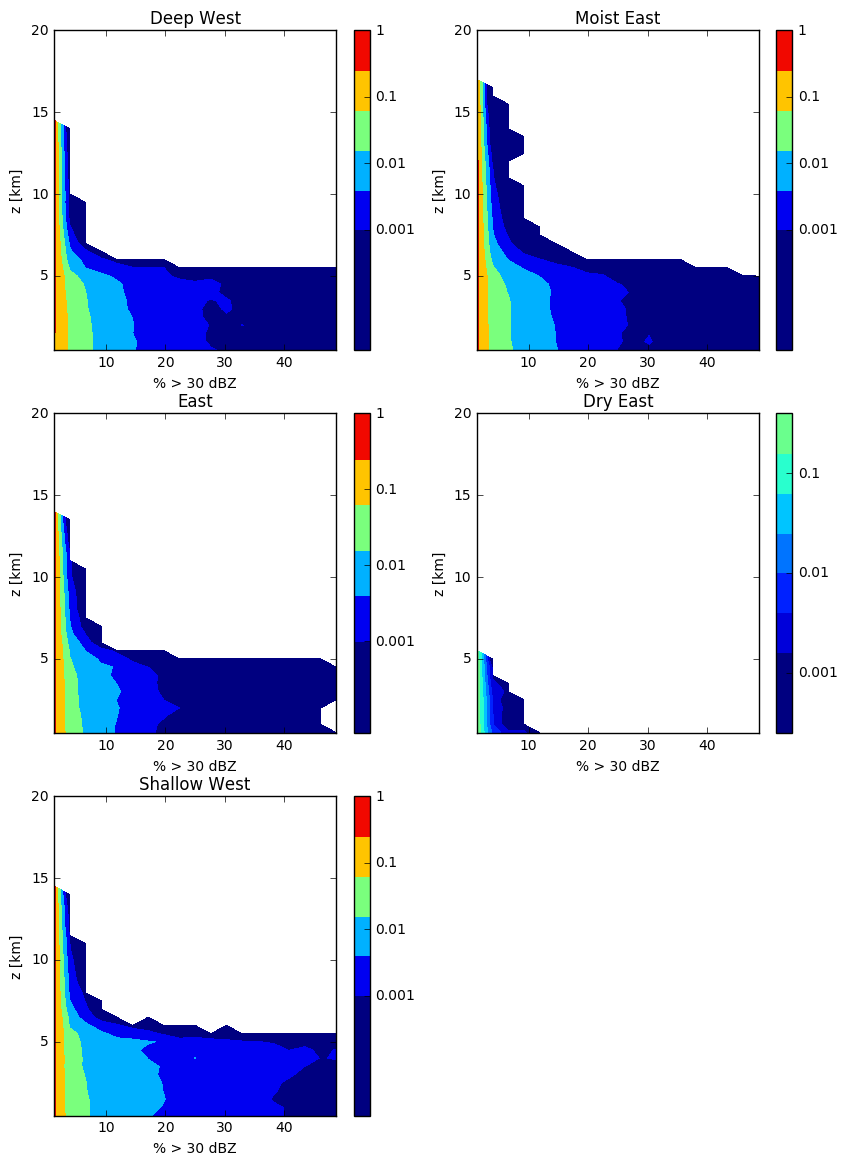

In [10]:
Y = levels
X = ((bins_30[1:]+bins_30[0:-1])/2)

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,14))
plt.subplot(321)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist[:,0,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Deep West')

plt.subplot(322)
Y = levels
X = ((bins_30[1:]+bins_30[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist[:,1,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Moist East')

plt.subplot(323)
Y = levels
X = ((bins_30[1:]+bins_30[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist[:,2,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])

ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('East')

plt.subplot(324)
Y = levels
X = ((bins_30[1:]+bins_30[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX, YY, np.log10(np.squeeze(SCP30_hist[:,3,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,2])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Dry East')

plt.subplot(325)
Y = levels
X = ((bins_30[1:]+bins_30[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP30_hist[:,4,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 30 dBZ')
plt.ylabel('z [km]')
plt.title('Shallow West')

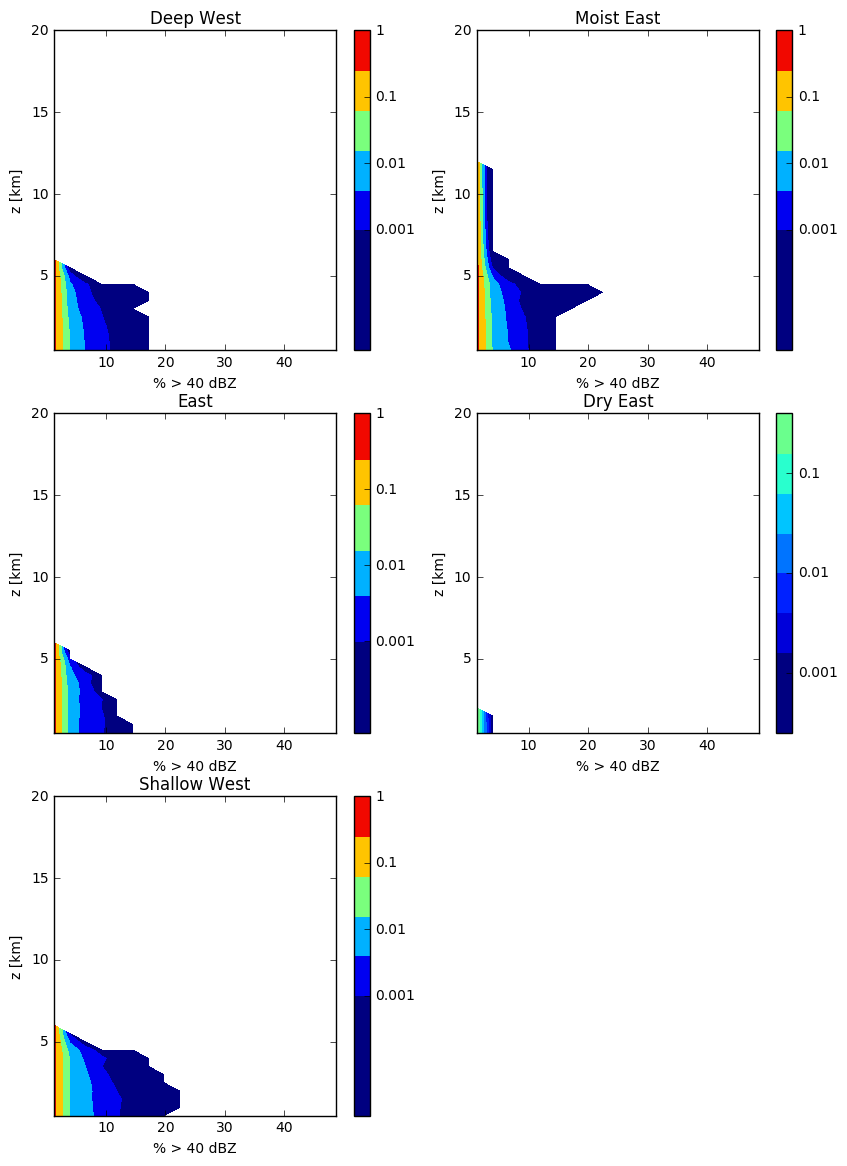

In [11]:
Y = levels
X = ((bins_40[1:]+bins_40[0:-1])/2)

XX, YY = np.meshgrid(X,Y)
plt.figure(figsize=(10,14))
plt.subplot(321)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist[:,0,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Deep West')

plt.subplot(322)
Y = levels
X = ((bins_40[1:]+bins_40[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist[:,1,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Moist East')

plt.subplot(323)
Y = levels
X = ((bins_40[1:]+bins_40[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist[:,2,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])

ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('East')

plt.subplot(324)
Y = levels
X = ((bins_40[1:]+bins_40[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX, YY, np.log10(np.squeeze(SCP40_hist[:,3,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,2])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Dry East')

plt.subplot(325)
Y = levels
X = ((bins_40[1:]+bins_40[0:-1])/2)
XX, YY = np.meshgrid(X,Y)
plt.contourf(XX,YY,np.log10(np.squeeze(SCP40_hist[:,4,:])),
             vmin=-2,vmax=1)
ax = plt.colorbar(ticks=[-3, -2, -1, 0, 1])
plt.clim([-3,0])
ax.ax.set_yticklabels(['0.001', '0.01','0.1','1']) 
plt.xlabel('% > 40 dBZ')
plt.ylabel('z [km]')
plt.title('Shallow West')